<a href="https://www.kaggle.com/aminizahra/logistic-regression-binary-classification?scriptVersionId=88419672" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Binary Classification**

In [1]:
#import our library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Get our dataset
train_data = np.genfromtxt('../input/iris-data/iris-train.data', delimiter=',', names=True)
test_data = np.genfromtxt('../input/iris-data/iris-test.data', delimiter=',', names=True)

In [3]:
#Define our features and target 
x1 = np.transpose(np.asmatrix(train_data['x1']))
x2 = np.transpose(np.asmatrix(train_data['x2']))
x = np.append(x1, x2, 1)
y = np.transpose(np.asmatrix(train_data['y']))

#-----------------------------------------------------------

xtest1 = np.transpose(np.asmatrix(test_data['x1']))
xtest2 = np.transpose(np.asmatrix(test_data['x2']))
xtest = np.append(xtest1, xtest2, 1)
ytest = np.transpose(np.asmatrix(test_data['y']))


In [4]:
#Define theta and x_0
ones = np.ones((x.shape[0],1))
onestest = np.ones((xtest.shape[0],1))
one_x = np.append(ones, x, 1)
one_xtest = np.append(onestest, xtest, 1)

m, n = np.shape(one_x)
theta = np.zeros((1,n))
theta = np.transpose(theta)
theta_new = theta


In [5]:
#main function for binary classification(logistic Regression)

#Define our iteration & Learning Rate 
loops= 1000
alpha = 0.002
#--------------------------------

#Define our MSE function with Gradient
mse = np.zeros((loops,2))
r = 0

while r < loops:    
    
    h_theta = 1/(1+np.exp(-1*(one_x*theta)))
    gradient = one_x.T*(h_theta-y)
    theta = theta - alpha*gradient    
    y_pred = 1/(1+np.exp(-1*(one_x*theta)))
    
    loop_mse = 0
    for i in range(0, m):       
        
        loop_mse += -(y.A1[i]*np.log(1/(1+np.exp(-1*(one_x[i]*theta))))) - ((1-y.A1[i])*np.log(1-(1/(1+np.exp(-1*(one_x[i]*theta))))))
    loop_mse = loop_mse/(m)
    mse[r,0] = r
    mse[r,1] = loop_mse
    
    r += 1
    
print('Number of iteration = ',loops)
print('Learning Rate = ',alpha)
print('Theta[0] = ', theta.A1[0])
print('Theta[1] = ', theta.A1[1])
print('Theta[2] = ', theta.A1[2])


Number of iteration =  1000
Learning Rate =  0.002
Theta[0] =  -1.2094046873914812
Theta[1] =  3.528541769808613
Theta[2] =  -5.909595572383452


In [6]:
#Calculate our h(theta)
y_pred = 1/(1+np.exp(-1*(one_x*theta)))
y_pred_test = 1/(1+np.exp(-1*(one_xtest*theta)))

In [7]:
#calculate train MSE
train_mse = 0
m = y.shape[0]
for i in range(m):
    train_mse += ((y.A1[i] - y_pred.A1[i])**2)
train_mse = train_mse/(2*m)
print("Train MSE = ", train_mse)

Train MSE =  0.0023774414076358987


In [8]:
#calculate test MSE
test_mse = 0
m = ytest.shape[0]
for i in range(m):
    test_mse += ((ytest.A1[i] - y_pred_test.A1[i])**2)
test_mse = test_mse/(2*m)
print("Test MSE = ", test_mse)

Test MSE =  0.01814497757393617


In [9]:
#classification our dataset in 2 class
minx1 = np.min(x1)
maxx1 = np.max(x1)
x2_1 = -(theta.A1[0] + theta.A1[1]*minx1)/theta.A1[2]
x2_2 = -(theta.A1[0] + theta.A1[1]*maxx1)/theta.A1[2]

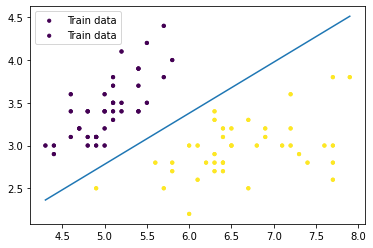

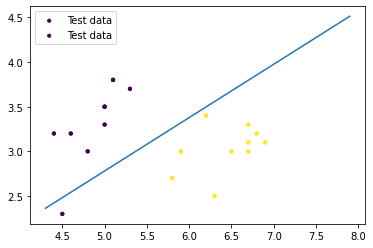

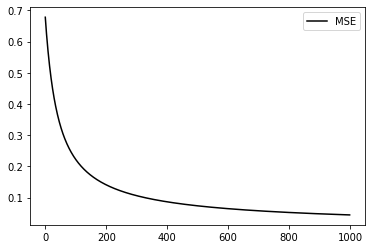

In [10]:
#Plot our dataset and MSE
plt.scatter(train_data['x1'],train_data['x2'], c=train_data['y'], s = 10, label = 'Train data')
plt.scatter(train_data['x1'],train_data['x2'], c=train_data['y'], s = 10, label = 'Train data')
plt.legend(loc = 'upper left')
plt.plot((minx1,maxx1), (x2_1,x2_2))
plt.show() 

plt.scatter(test_data['x1'],test_data['x2'], c=test_data['y'], s = 10, label = 'Test data')
plt.scatter(test_data['x1'],test_data['x2'], c=test_data['y'], s = 10, label = 'Test data')
plt.legend(loc = 'upper left')
plt.plot((minx1,maxx1), (x2_1,x2_2))
plt.show() 

plt.plot(mse.T[0], mse.T[1], color = "black", label = 'MSE') 
plt.legend(loc = 'upper right')
plt.show() 